# Basic_Deep_Learning 

### 우리가 이미 알고 있는 것.
 - 1. Regression : $ y = ax + b $ <- Hypothesis (식)
 - 2. Cost => Minimize 
![img3](data/3.png) 
![img1](data/1.PNG)


### Cost 
 - $H(x) = Wx$ 간단하게 표현
 - $Cost(W) = \sum_{1}^{m}({Wx}^{i}-{y}^{i})^2$
 - W 값을 변경해 가면서 Cost값이 가장 낮은 곳을 찾는다. 

## Gradient Descent (경사하강법)
 - 위의 Cost값을 최소한으로 하는 W를 찾아내는 방법을 Gradient Descent라 한다. 
![img2](data/7.PNG)
![img2](data/4.png)
![img2](data/5.png)
![img2](data/6.png)

## 신경망의 특징 
 - 신경망의 경우 활성화 되고 안되고 즉, 결과값이 0 또는 1값을 가지게 된다.
  - 최종 Output의 경우 적용 되는 부분
  - X라는 값으로 Y로 출력 
  - X라는 값이 입력될 때 가중치 W가 적용되고 각 값에 대해서 Bias (B)가 가해 진다. 
  - 즉, $W*X + b$
![img1](img/1.PNG)
![img9](data/8.PNG)
![img9](data/9.PNG)

## 위의 기본 컨셉을 함수로 표현가능하다고 생각하다는 것에서 시작
![img2](img/2.PNG)

- 위의 함수 즉, 뉴랄을 가지고는 and 또는 or 문제는 해결이 가능하다. 
 - 하지만, xor 문제는 단순한 선형 직선으로 풀 수 없는 문제로 발견. Neural Net의 발전이 멈추는 계기가 되었다.
 - 위의 문제를 해결하기 위해서 아래와 같은 그림으로 Multi Layer Perceptron으로 해결이 가능하며, 이 가중치를 학습하는 방법이 Back Propagation이다. 


 - 이러한 값을 조절해주는 것이 $Step \ Function$ (계단 함수라고 한다.)
## 계단 함수 
![img9](data/10.PNG)

### 시그모이드 
![img9](data/11.PNG)

### 쌍탄젠트 
![img9](data/12.PNG)

### Relu 
![img9](data/13.PNG)


#### ReLu의 경우 0~ 무한대 값을 가진다.
 - 그러므로 중간 Hidden layer에는 사용할 수 있지만 결과값의 출력하는 부분에서는 사용 할 수 없다. 


![img3](img/3.PNG)

## XOR 문제 
![img4](img/4.PNG)
![img5](img/5.PNG)
![img6](img/6.PNG)
![img7](img/7.PNG)

## BackPropagation
![img13](img/13.PNG)

### Cost Minimize 
 - Gradient Descent 를 이용하여 Cost 를 감소 시켜야 한다.

![img14](img/14.PNG)

## 미분 특징 
 - <a href="https://youtu.be/oZyvmtqLmLo">Sung Kim교수의 미분 강의 </a>
 
![img15](img/15.PNG)

![img16](img/16.PNG)

#### 위의 미분 결과값에 의해 가중치들을 조절할 수가 있다. 
 - 내가 원하는 값보다 크게 나왔다면 - 영향이 있는 놈을 높이고 + 영향이 있는 놈을 낮추면 된다. 
 
### But Back Propagation에서 Sigmoid를 사용했을 경우 단점이 발생 
 - backpropagation 이 엄청난 레이어로 수성되면 작동이 잘 안됐다 그 이유가 값들이 0.몇 이러한 형태로만 출력되서 뒤로 가면 갈수록 앞의 값이 전달이 잘 안되서 학습이 어려웠다.
 - 이러한 문제점을 해결하기 위해 나온 것이 ReLu 라는 Step Function (이미지는 집에 있는 것 쓰기.)

### ReLu 
 - 0 이상의 값이 입력 됐을 경우 x -> x로 값이 출력.
 - 0 ~ 1값만 취급하던 Sigmoid에 비해 값이 크게 적용 되므로 값의 전달이 깊고 넓게 적용 될 수 있다.

# 학교 DeepLearning 복습 
## MNIST 
 - 손글씨로 된 그림 데이터 맞추기 
 - 0 ~ 9 까지 숫자
 - train, test Set 으로 나누어져 있음 
 - Train : 60000개, Test : 10000개 

In [2]:
import keras

Using TensorFlow backend.


### MNIST 데이터 불러오기 

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

#### Train 
  - (60000, 28, 28)
  - 60000 : 데이터 셋 갯수
  - 28 : width(가로 길이)
  - 28 : height(세로 길이)

In [5]:
x_test.shape

(10000, 28, 28)

#### Test
 - 10000개 데이터 
 - 위와 동일하게 28 x 28 데이터 

In [6]:
n_train, width, height = x_train.shape

 - Python 문법에서 _ <- 는 필요 없는 부분을 버리는 역할을 한다.
  - 왜? 이러한 문법을 현재 사용하는가. 
  - 이미 위에서 test부분에서 width, height를 가져 왔기 때문에 패스하는 부분

In [7]:
n_test, _, _ = x_test.shape

### 데이터 보기 

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

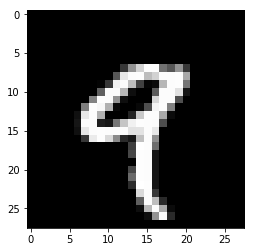

In [11]:
plt.imshow(x_train[4,], cmap='gray')

In [12]:
y_train[4,]

9

### 데이터 전처리 
#### 입력 (Input Layer)
 - 입력 부분에서 현재 나와있는 형태 
 - 데이터 모양을 28 * 28 형태로 넣을 수가 없으므로 
 - 28 / 28 / 28 / 28 / 28 ~~~~~~~~~~~~~~~ 28개 형태로 붙여서 한줄로 만들어서 입력 으로 만든다. 
 - 예제

In [1]:
import numpy as np

In [2]:
a = np.array([0,1,0,1,1,1,0])

In [3]:
b = np.array([[0],
    [1],
    [1],
    [0],
    [1],
    [0],
    [1]])

In [4]:
a.shape

(7,)

In [5]:
b.shape

(7, 1)

In [6]:
np.dot(a,b)## 이러한 형태로 matrix 곱을 해주기 위해서  

array([2])

In [15]:
x_train[4,] # 이러한 형태로는 Neural Net을 사용할 수 없다. 그렇기에 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

 - 60000개의 데이터를 28 * 28 = 784 개 데이터로 쭉 길에 풀어서 넣어야 한다. 

In [16]:
input_train = x_train.reshape(n_train, width*height)

In [17]:
input_train.astype('float32')

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [18]:
input_train = input_train / 255.0  # 0~255의 크기로 데이터가 존재하는데 해당 데이터를 크게 할 경우 학습에 어려움이 있다. Normalization

In [19]:
input_train.max()

1.0

- 테스트용 데이터도 동일하게 처리 

In [20]:
input_test = x_test.reshape(n_test, width*height)
input_test.astype('float32')
input_test = input_test / 255.0

#### 출력
 - 0이라는 문자가 있다. 왼쪽 반을 지우면 1이된다 하지만 또 반을 지운다고해서 2가 되지는 않는다.
 - 숫자는 범주형 데이터이다. (그림은)

In [21]:
output_train = keras.utils.to_categorical(y_train,10) # 0~9까지를 카테고리로 변환

In [22]:
output_train # one-hot encoding

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [23]:
output_test = keras.utils.to_categorical(y_test, 10)

#### 간단한 모델

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

## softmax 
 - What's the SoftMax Function 
 - 우리는 Logistic Regression을 알고 있다. (A or B / 1 or 0) 과 같이 2개의 값을 구별할 때 사용하는 Step function 
 - 이러한 내용을 Muliti Categorial Label 을 구별할 때는 단독으로는 사용할 수 없다. 
 
![img17](img/17.PNG)
![img18](img/18.PNG)
![img19](img/19.PNG)
![img20](img/20.PNG)
![img21](img/21.PNG)
![img22](img/22.PNG)
![img23](img/23.PNG)
![img24](img/24.PNG)
![img25](img/25.PNG)
![img26](img/26.PNG)
![img27](img/27.PNG)
![img28](img/28.PNG)

In [26]:
model = Sequential()
model.add(Dense(392, activation='tanh', input_shape=(784,)))
model.add(Dense(10, activation='softmax')) 

### Activation : tanh graph
![img9](data/12.PNG)

In [27]:
model.summary() # dense_1 에는 784 * 392 + 392 bias가 있다. 라는 param

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3930      
Total params: 311,650
Trainable params: 311,650
Non-trainable params: 0
_________________________________________________________________


 - loss : 우리 모델이 얼마나 부정확하냐 
  - mean_squared_error : MSE  −1/𝑁 ∑(𝑦−𝑦 ̂ )^2 
  - cross entropy : 내가 뭔가를 맞출때 높은 확률로 맞춘거를 좋아해, 낮은 확률로 맞춘 것은 loss가 커진다. 배팅을 크게 했는데 못맞추면 loss 또한 커진다. 

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

### 트레이닝 

In [30]:
batch_size = 128 # 한번에 들어가는 데이터 크기 
epochs = 1 # 반복횟수

In [31]:
history = model.fit(input_train, output_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(input_test, output_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 4s - loss: 0.3328 - acc: 0.9016 - val_loss: 0.2330 - val_acc: 0.9312


In [32]:
history.history

{'acc': [0.90156666673024499],
 'loss': [0.33278176914850871],
 'val_acc': [0.93120000000000003],
 'val_loss': [0.23297160456180571]}

### 평가 

In [33]:
score = model.evaluate(input_test, output_test, verbose=0)
score

[0.23297160540521145, 0.93120000000000003]

# Comming up Next!!! 

## CNN 
 - 고양이의 시신경을 관찰 
 - 그림을 볼때 전체 누런이 활성화 되는 것이 아니라 일부만 활성화가되고 다른 그림을 보야주면 또 다른 뉴런이 활성화가 되는 형태를 보임 
 - 즉, 이 시신경들이 전체를 보는 것이 아니라 일부를 보고 나중에 조합하는 것이 아닌가 하는것이 cnn 의 개념